In [3]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset

import matplotlib.pyplot as plt

# Neural Netowrk HW

Goal: To familiarize you with how to construct and fit neural networks using pytorch. Additionally, you will investigate the universal function approximation theorem, look at how depth versus width of a netowrk influences its representational power, and look at how 

# Question 1 - In class

In this question, you will explore the universal function approximation theorem and invstigate the effect of depth versus width of a NN on its ability to fit a function. Below, I have provided a full code that generates data from a function and fits a NN with three layers, each with width = w. As you can see below, this is a semi-complicated function. In the code below, this function is fit with a 3-layer NN of width 30. I also provide some utility functions to plot the training and test error as a function of training iteration. Your task is to extend this in a few ways.

Task 1: In addition the 3-layer network, also construct a 2 layer and 1 layer network. Fit each of these three models to the data with varying widths in the range 5-200 neurons. That is, you will loop over different network widths and fit each of the three depth netowrks to the data with that width. Then plot the training and test errors as a function of network width. This should yield a plot with three curves representing error as a function of width.

Task 2: Choose an alternative data generating function of your choice. Something nice and complicated (more complicated than what I use here). Perform task 1 with your new function.

There are a number of extensions to this exercise that I encourage you to look at, but I will not require. For example, what if you use a different optimizer (e.g. SGD instead of Adam). What if you include L2 regularization? What happens if you have less or more training data? Playing around with these things will give you more intuition about how this all works.

Note that part of your job will be to make sense of what this code is doing so that you can learn to use pytorch for simple networks. I will be the first to admit that I don't write elegant code! If you have any questions about anything, let me know. And feel free to improve upon what I have provided as needed. Note that you will be augmenting this code in the following question as well.

In [41]:
# Task 1: Fit the 3-layer, 2-layer, 1-layer networks with different widths
# Plot the training and test errors as a function of network width

# LOSS = SSE = true - predicted (but squared)
# classifictation SSE = cost but also a sensible to present error
# continuous = SSE insufficient

w = np.linspace(10, 50, num = 9, dtype=int)
losses3train = []
loss_3test = []

losses2train = []
loss_2test = []

losses1train = []
loss_1test = []

for i in w:
    # 3-layer:
    losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_train ,
                        model_to_test = Linear_3Hidden, width = i , weight_decay = 0)
    
    losses3train.append(losses[-1])
    loss_3test.append(loss_test[-1])

    
    # 2-layer:
    # training error
    losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_train ,
                        model_to_test = Linear_2Hidden, width = i , weight_decay = 0)
    
    losses2train.append(losses[-1])
    loss_2test.append(loss_test[-1])
    

    # 1-layer:
    # training error
    losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_1Hidden, width = i , weight_decay = 0)
    
    losses1train.append(losses[-1])
    loss_1test.append(loss_test[-1])


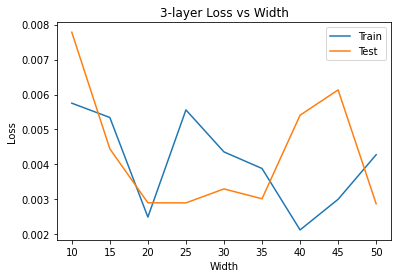

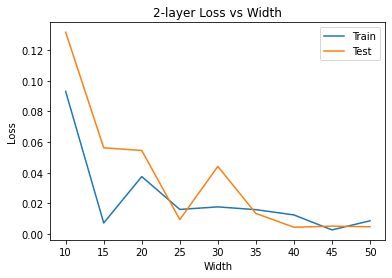

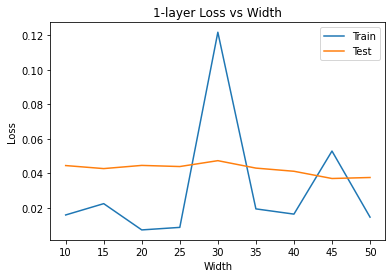

In [42]:
# 3 layer
fig = plt.figure()
plt.plot(w, losses3train, w, loss_3test)
plt.title('3-layer Loss vs Width')
plt.xlabel('Width')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

# 2 layer
fig2 = plt.figure()
plt.plot(w, losses2train, w, loss_2test)
plt.title('2-layer Loss vs Width')
plt.xlabel('Width')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

# 1 layer
fig3 = plt.figure()
plt.plot(w, losses1train, w, loss_1test)
plt.title('1-layer Loss vs Width')
plt.xlabel('Width')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

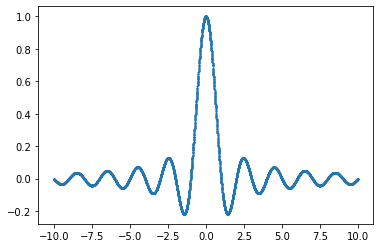

In [43]:
# Task 2: an alternative more complicated function (Sinc!)
def f_x(x):
    return np.sinc(x) # random function to learn

n_x_train = 30000   # the number of training datapoints
n_x_test = 8000     # the number of testing datapoints


x_train = np.random.rand(n_x_train,1)*20 - 10  # Initialize a vector of with dimensions [n_x, 1] and extend
y_train = f_x(x_train)

x_test = np.random.rand(n_x_test, 1)*20 - 10   # Repeat data generation for test set
y_test = f_x(x_test)

fig0 = plt.figure()  # initialize a plot
plt.scatter(x_train, y_train, marker='o', s=0.2)  # plot x vs y
plt.show()  # open a window with the plot (you have to close it for the script to finish)

In [44]:
w = np.linspace(10, 50, num = 9, dtype=int)
losses3train = []
loss_3test = []

losses2train = []
loss_2test = []

losses1train = []
loss_1test = []

for i in w:
    # 3-layer:
    losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_train ,
                        model_to_test = Linear_3Hidden, width = i , weight_decay = 0)
    
    losses3train.append(losses[-1])
    loss_3test.append(loss_test[-1])

    
    # 2-layer:
    # training error
    losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_train ,
                        model_to_test = Linear_2Hidden, width = i , weight_decay = 0)
    
    losses2train.append(losses[-1])
    loss_2test.append(loss_test[-1])
    

    # 1-layer:
    # training error
    losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_1Hidden, width = i , weight_decay = 0)
    
    losses1train.append(losses[-1])
    loss_1test.append(loss_test[-1])


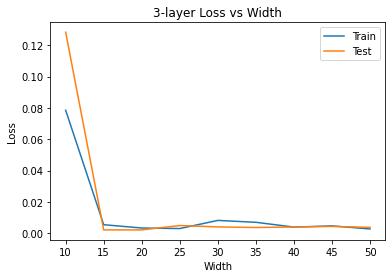

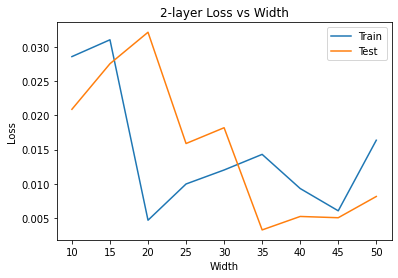

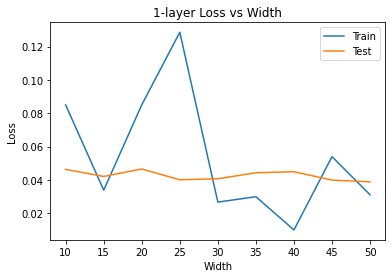

In [45]:
# 3 layer
fig = plt.figure()
plt.plot(w, losses3train, w, loss_3test)
plt.title('3-layer Loss vs Width')
plt.xlabel('Width')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

# 2 layer
fig2 = plt.figure()
plt.plot(w, losses2train, w, loss_2test)
plt.title('2-layer Loss vs Width')
plt.xlabel('Width')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

# 1 layer
fig3 = plt.figure()
plt.plot(w, losses1train, w, loss_1test)
plt.title('1-layer Loss vs Width')
plt.xlabel('Width')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

## Question 1 - Approach and seed code.

1) Construct training and test data. Recast as pytorch Dataset. Then construct a dataloader class for batching.

2) Define a NN class.

3) Construct a function to run the model training.

4) Construct some utility fynctions for plotting and testing accuracy.

5) Run the model and check results

In [4]:
def f_x(x):
    return np.exp(-x/10)*np.sin(x)/2.5 + np.random.randn(len(x), 1)/20 # random function to learn

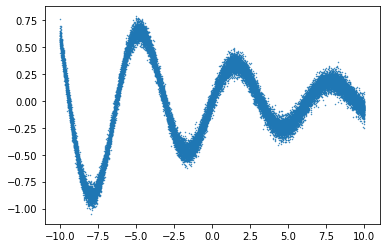

In [5]:
n_x_train = 30000   # the number of training datapoints
n_x_test = 8000     # the number of testing datapoints


x_train = np.random.rand(n_x_train,1)*20 - 10  # Initialize a vector of with dimensions [n_x, 1] and extend
y_train = f_x(x_train)

x_test = np.random.rand(n_x_test, 1)*20 - 10   # Repeat data generation for test set
y_test = f_x(x_test)

fig0 = plt.figure()  # initialize a plot
plt.scatter(x_train, y_train, marker='o', s=0.2)  # plot x vs y
plt.show()  # open a window with the plot (you have to close it for the script to finish)

## Setup data sets in pytorch format

In [6]:
class SineDataset(Dataset):
    def __init__(self, x, y):
        x_dtype = torch.FloatTensor
        y_dtype = torch.FloatTensor     # Use float for continuous data

        self.length = x.shape[0]

        # 1) Extract data from numpy, 2) put it in a tensor, 3) properly data type it.
        self.x_data = torch.from_numpy(x).type(x_dtype)
        self.y_data = torch.from_numpy(y).type(y_dtype)

    # Method for getting an element.
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # Method for getting the length of the dataset
    def __len__(self):
        return self.length

In [7]:
# Recast the training and test data sets into proper pytorch tensors.
dataset_train = SineDataset(x=x_train, y=y_train)
dataset_test = SineDataset(x=x_test, y=y_test)

print("Train set size: ", dataset_train.length)
print("Test set size: ", dataset_test.length)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train, batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch
# data_loader_test = DataLoader(dataset=dataset_test, batch_size=batch_size_train, shuffle=False) 

Train set size:  30000
Test set size:  8000


## Setup model

In [17]:
class Linear_3Hidden(nn.Module):
    '''
    A simple, general purpose, fully connected network
    '''
    def __init__(self,width):
        # Perform initialization of the pytorch superclass
        super(Linear_3Hidden, self).__init__()
        
        # Define network layer dimensions
        D_in, H1, H2, H3, D_out = [1, width, width, width, 1]    # These numbers correspond to each layer: [input, hidden_1, output]
        
        # Define layer types
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        self.linear4 = nn.Linear(H3, D_out)

    def forward(self, x):
        '''
        This method defines the network layering and activation functions
        '''
        x = self.linear1(x) # hidden layer
        x = torch.tanh(x)       # activation function
        
        x = self.linear2(x) # hidden layer
        x = torch.tanh(x)       # activation function
        
        x = self.linear3(x) # hidden layer
        x = torch.tanh(x)       # activation function

        x = self.linear4(x) # output layer
        
        return x
# Task 1: construct a 2 layer network
class Linear_2Hidden(nn.Module):
    '''
    A simple, general purpose, fully connected network
    '''
    def __init__(self,width):
        # Perform initialization of the pytorch superclass
        super(Linear_2Hidden, self).__init__()
        
        # Define network layer dimensions
        D_in, H1, H2, D_out = [1, width, width, 1]    # These numbers correspond to each layer: [input, hidden_1, output]
        
        # Define layer types
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    def forward(self, x):
        '''
        This method defines the network layering and activation functions
        '''
        x = self.linear1(x) # hidden layer
        x = torch.tanh(x)       # activation function
        
        x = self.linear2(x) # hidden layer
        x = torch.tanh(x)       # activation function

        x = self.linear3(x) # output layer
        
        return x

# Task 1: construct a 1 layer network
class Linear_1Hidden(nn.Module):
    '''
    A simple, general purpose, fully connected network
    '''
    def __init__(self,width):
        # Perform initialization of the pytorch superclass
        super(Linear_1Hidden, self).__init__()
        
        # Define network layer dimensions
        D_in, H1, D_out = [1, width, 1]    # These numbers correspond to each layer: [input, hidden_1, output]
        
        # Define layer types
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, D_out)

    def forward(self, x):
        '''
        This method defines the network layering and activation functions
        '''
        x = self.linear1(x) # hidden layer
        x = torch.tanh(x)       # activation function

        x = self.linear2(x) # output layer
        
        return x
    

## Some testing utility functions.

In [10]:
def test_batch(model, x, y):
    # run forward calculation
    y_predict = model.forward(x)

    return y, y_predict

#####
def test(model, test_loader):
    y_vectors = list()
    y_predict_vectors = list()

    batch_index = 0
    for x, y in test_loader:
        y, y_predict = test_batch(model=model, x=x, y=y)

        y_vectors.append(y.data.numpy())
        y_predict_vectors.append(y_predict.data.numpy())

        batch_index += 1

    y_predict_vector = np.concatenate(y_predict_vectors)

    return y_predict_vector 

## Construct a function that loops over epochs and batches for training.

In [11]:


##### Train on a specific batch of data.
def train_batch(model, x, y, optimizer, loss_fn):
    # Run forward calculation
    y_predict = model.forward(x)

    # Compute loss.
    loss = loss_fn(y_predict, y)

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable weights
    # of the model)
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

    return loss.data.item()

##### Iterate over epochs and all batches of data
def train(model, train_loader , test_loader , optimizer, loss_fn, epochs=5):
    losses = list()
    losses_test = list()

    batch_index = 0
    for e in range(epochs):
        for x, y in train_loader:
            loss = train_batch(model=model, x=x, y=y, optimizer=optimizer, loss_fn=loss_fn)
            losses.append(loss)

            batch_index += 1
            
        for x , y in test_loader:
            y_predict = model.forward(x)
            losst = loss_fn(y_predict, y)
            
            losses_test.append(losst.data.item())

#         print("Epoch: ", e+1)
#         print("Batches: ", batch_index)

    return losses , losses_test

## Plotting utility

In [12]:

def plot_loss(losses_train,loss_test, show=True):
    fig = plt.gcf()
    fig.set_size_inches(8,6)
    ax = plt.axes()
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Loss")
    x_loss = list(range(len(losses)))
    plt.plot(x_loss, losses_train)
    

    a = list(range(len(loss_test)))
    const = round(len(losses) / len(loss_test))
    b = [(i+1)*const for i in a]
    
    plt.plot(b,loss_test)

    if show:
        plt.show()

    plt.close()

## Script for running the actual model

In [13]:

def run(data_loader_train, data_loader_test , model_to_test , width , weight_decay):
    
    
    # Define the hyperparameters
    learning_rate = 1e-3
    model = model_to_test(width=width)
    
    # Initialize the optimizer with above parameters
    optimizer = optim.Adam(model.parameters(), lr=learning_rate , weight_decay = weight_decay)

    # Define the loss function
    loss_fn = nn.MSELoss()  # mean squared error

    # Train and get the resulting loss per iteration
    loss , loss_test = train(model=model, train_loader=data_loader_train , test_loader = data_loader_test, 
                 optimizer=optimizer, loss_fn=loss_fn)
    
    # Test and get the resulting predicted y values
    y_predict = test(model=model, test_loader=data_loader_test)

    return loss , loss_test , y_predict

Final loss: [0.005308232270181179]


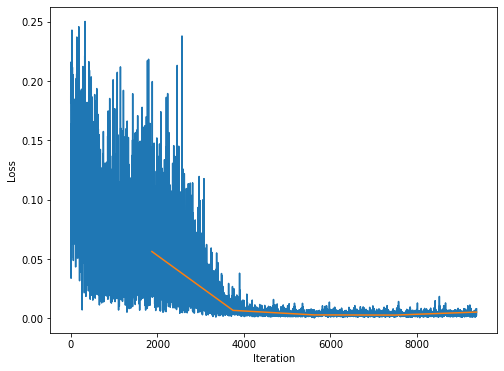

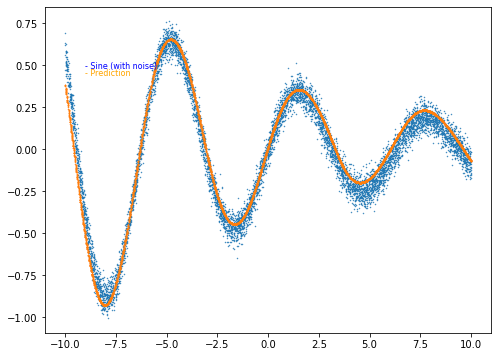

In [14]:


losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_3Hidden, width = 30 , weight_decay = 0)

print("Final loss:", loss_test[-1:])
plot_loss(losses,loss_test)

fig2 = plt.figure()
fig2.set_size_inches(8,6)
plt.scatter(x_test, y_test, marker='o', s=0.2)
plt.scatter(x_test, y_predict, marker='o', s=0.3)
plt.text(-9, 0.44, "- Prediction", color="orange", fontsize=8)
plt.text(-9, 0.48, "- Sine (with noise)", color="blue", fontsize=8)
plt.show()

## Getting started with MNIST

In [46]:
# trainset = torchvision.datasets.MNIST(root='./data/mnist', train=True, 
#                                         download=True, 
#                                         transform=transforms.ToTensor())

# testset = torchvision.datasets.MNIST(root='./data/mnist', train=False, 
#                                         download=True, 
#                                         transform=transforms.ToTensor())

import torchvision.transforms as transforms # Common image transforms. Will use this to transform images to tensors
import torchvision.datasets as dsets # Will pull MNIST data from this.

# Load data and transform to tensors. This produces collection of tuples (img-tensor, digit label)
trainset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download = True)
testset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download = True)


In [47]:
batch_size = 30
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([30, 1, 28, 28])
torch.Size([1, 28, 28])
7


# Question 2 - Classification with pytorch - HW

In the previous question, you applied a NN to fit a continuous function. The other major use case of feedforward NNs is classification, involving discrete data. Here you will edit the pytorch code below to perform a classification task. We'll use the classic MNIST digit data set. 

Task 1: Use Pytorch to perform classification on MNIST using a NN with hidden layers of similar structure to the code provided below. You can either I) Update your MNIST logistic regression code from a prior assignment. Or II) update the code below to handle this. If you choose to use the code below, the main conceptual change that is required here is that you change the loss function from MSE to Cross_Entropy. Specifically, the following adjustments of the current code would be required (if I miss something, please let me know).

1) Change the data. I provide code at the bottom of this script to import and format the MNIST data.

2) Change the loss function. You'll have to understand the code well enough to know where to do this.

3) Change the optimizer to SGD and use a learning rate of 0.01. Play around with Adam as well.

4) Construct a network with two hidden layers using RELU units, the first with 48 units and the second with 24. The first will be a 784x48 fully connected layer with a RELU (since the images are 28x28 = 784). The final layer will be a 24x10 layer (since there are 10 classes).

Using these updates, fit this model and plot the training and test error as a function of iteration.

Task 2: Compare your results to the standard logistic regression classifier on this data. Recall, you coded a logistic regression for MNIST in a prior HW, so you should already have this. You do not need to import and rerun your regression code. Just tell me what your test accuracy was on the regression versus the NN.

Task 3: Now that you have a trained NN classifier for MNIST, lets break it. Here we'll look at what happens if you rotate or translate the images. Can the NN trained on the original images properly classify the "augmented" images. Rotate and translate your test set images, feed them through your pre-trained classifier, and check your accuracy. I'll provide a snippet of code that uses torchvision to rotate and translate the images.

And again, while I will not require this, I encourage you to play with some of the hyper-parameters of this model. What happens if you add layers, or make the layers wider? How about regularization? What happens if you change from RELU units to sigmoid or tanh?? 


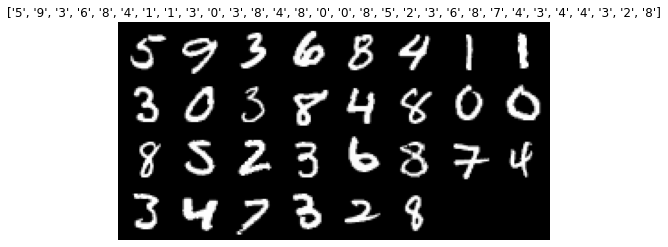

In [48]:
def imshow(img, title)
    
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(title)
    plt.show()
    
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])
    
    return images, labels

images, labels = show_batch_images(trainloader)

In [51]:
# Setting up data for training
batch_size = 512 # Try varying this. Its on the large side for minibatches.
data_loader_train = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
data_loader_test = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=False) # No batching or shuffling

In [57]:
class Linear_2Hidden(nn.Module):
    '''
    A simple, general purpose, fully connected network
    '''
    def __init__(self,width):
        # Perform initialization of the pytorch superclass
        super(Linear_2Hidden, self).__init__()
        
        # Define network layer dimensions
        D_in, H1, H2, D_out = [784, 48, 48, 10]    # These numbers correspond to each layer: [input, hidden_1, output]
        
        # Define layer types
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    def forward(self, x):
        '''
        This method defines the network layering and activation functions
        '''
        x = x.reshape(x.shape[0], 28*28)
        x = self.linear1(x) # hidden layer
        torch.nn.ReLU()       # activation function
        
        x = self.linear2(x) # hidden layer
        torch.nn.ReLU()       # activation function

        x = self.linear3(x) # output layer
        
        return x

In [58]:
# MNIST run
def run(data_loader_train, data_loader_test , model_to_test , width , weight_decay):
    
    
    # Define the hyperparameters
    learning_rate = .01
    model = model_to_test(width=width)
    
    # Initialize the optimizer with above parameters
    #optimizer = optim.Adam(model.parameters(), lr=learning_rate , weight_decay = weight_decay)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate , weight_decay = weight_decay)
    # Define the loss function
    loss_fn = nn.CrossEntropyLoss() # cross entropy loss

    # Train and get the resulting loss per iteration
    loss , loss_test = train(model=model, train_loader=data_loader_train , test_loader = data_loader_test, 
                 optimizer=optimizer, loss_fn=loss_fn)
    
    # Test and get the resulting predicted y values
    y_predict = test(model=model, test_loader=data_loader_test)

    return loss , loss_test , y_predict

Final loss: [0.8515471816062927]


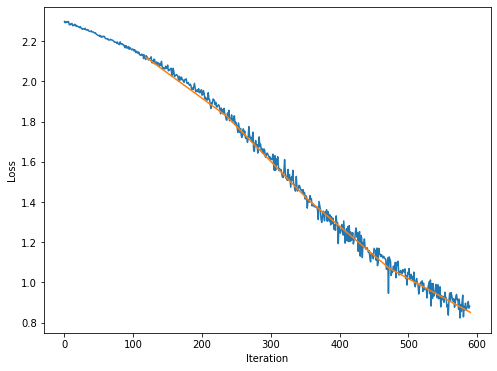

In [59]:
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 30 , weight_decay = 0)

print("Final loss:", loss_test[-1:])
plot_loss(losses,loss_test)

plt.show()

Task 2: Compare your results to the standard logistic regression classifier on this data. Recall, you coded a logistic regression for MNIST in a prior HW, so you should already have this. You do not need to import and rerun your regression code. Just tell me what your test accuracy was on the regression versus the NN.

The loss from the logistic regression classifier was 0.65. The loss of the NN was 0.85 so this performed worse.

Task 3: Now that you have a trained NN classifier for MNIST, lets break it. Here we'll look at what happens if you rotate or translate the images. Can the NN trained on the original images properly classify the "augmented" images. Rotate and translate your test set images, feed them through your pre-trained classifier, and check your accuracy. I'll provide a snippet of code that uses torchvision to rotate and translate the images.

#### The code below creates a separate data loader that rotates or shifts the images.

In [63]:
# This shifts horizintally and vertically but does NOT rotate (degrees = 0)
transform = torchvision.transforms.Compose([torchvision.transforms.RandomAffine(degrees = 0, translate=(0.2,0.2),
                                            scale=None, shear=None, resample=False, fillcolor=0),
                                             torchvision.transforms.ToTensor()])

# This rotates randomly by up to 90 degrees but does NOT shift. Use one or the other, or combine!
transform = torchvision.transforms.Compose([torchvision.transforms.RandomAffine(degrees = 90, translate=(0,0),
                                            scale=None, shear=None, resample=False, fillcolor=0),
                                             torchvision.transforms.ToTensor()])

testset_rot = torchvision.datasets.MNIST(root='./data', train=False, 
                                        download=True, 
                                        transform=transform)

batch_size = 512
testloader_rot = torch.utils.data.DataLoader(testset_rot, batch_size=batch_size, shuffle=True)

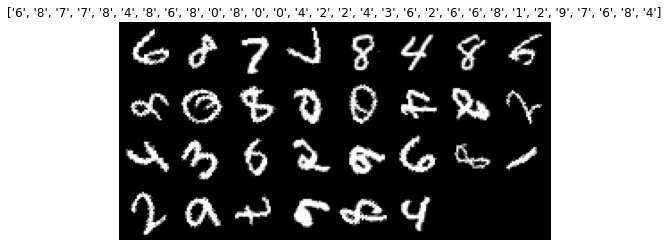

In [61]:
images, labels = show_batch_images(testloader_rot)

Final loss: [2.0277671813964844]


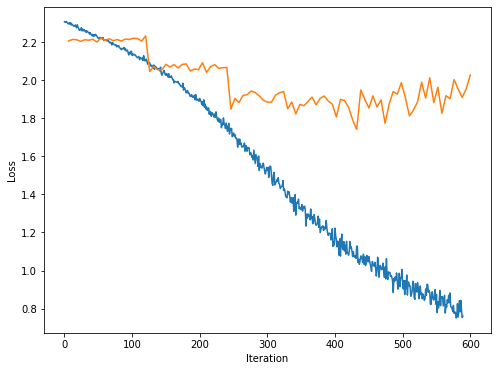

In [64]:
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=testloader_rot ,
                        model_to_test = Linear_2Hidden, width = 30 , weight_decay = 0)

print("Final loss:", loss_test[-1:])
plot_loss(losses,loss_test)

plt.show()

This makes sense becauset the model was trained on the unrotated data so when testing it on the rotated data, it does not work.

# Question 3 Simple Backprop - HW

In this assignment, you will construct a very simple multi-layer NN and perform backpropagation with it. Consider a network with four layers of neurons, each containing just a single neuron. In this case, there is an input (xin), and three sets of parameters (b0,w0), (b1,w1), (b2,w2) , (b3,w3) corresponding to biases and weights for each neuron. For this network, use the standard sigmoid activation function along with the standard squared error cost function.

We will not be "training" this network. Instead, the purpose of this is for you to code up the forward and backward passes of backpropagation for this simplest of networks without the complexity of having to deal with indexing multiple neurons in each layer.

Below I provide a set of true weights and biases along with an input that you should use. These are the parameters that will produce the (in,out) = (0.5,0.628) pair. I also provide a set of test parameters you should use to test your backpropagation. Use exactly these as I will check your results against mine.

Code the following:

1) A function that calculates the sigmoid and its derivative.

2) A function that calculates the cost function and its derivative.

3) A function that takes an input, computes a forward pass through the network, and outputs the pre-activations and activations of the network.

4) A function that takes the output of the forward pass and calculates the back-propagated derivatives. This function could output the derivatives with respect to all weights and biases. With the "true".

5) With the "true" (in,out) pair provided, and the test weights, use your above codes to compute and print the derivatives with respect to all eight parameters. Output them for me to see.

The full backpropagation algo for more complex networks is programmatically more difficult than this, but if you understand this, you understand the principles of backprop. The rest is just indexing or tensor (matrix that is) slicing hell!



#### Code for parameters to use

%%%%% True weights to generate output
weights_true = np.array([0.3,0.5,0.7 , 0.4])
bias_true = np.array([-0.1,0.3,1,0.2])

Nlayer = len(weights_true)

xin=0.5
%%%%% This input should produce an output of 0.628 as the output of the final layer.

%%%%% New warameters to calculate backprop gradients on.
np.random.seed(4)
w_test = weights_true + 1*np.random.randn(Nlayer)
b_test = bias_true + 1*np.random.randn(Nlayer)

In [103]:
# 1) a function that calculates the sigmoid and its derivative
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

def sigmoid_derivative(x):
    
    s = 1 / (1 + np.exp(-x)) # sigmoid
    ds = s * (1 - s) # derivative of sigmoid
    
    return ds

# 2) A function that calculates the cost function and its derivative.
# def cost(x):
#     loss_fn = nn.MSELoss(x)
#     deriv = loss.backward()


# 3) A function that takes an input, computes a forward pass through the network, and outputs the pre-activations and activations of the network.

def activate(w, b, x, Nlayer): 
    z = []
    xl = []
    xl.append(x)
    for i in range(1, Nlayer): 
        zi = w[i]*xl[i-1] + b[i]
        z.append(zi) # preactivation
        xl.append(sigmoid(zi)) # activation
    return z,xl



# 4) A function that takes the output of the forward pass and calculates the back-propagated derivatives. 
# This function could output the derivatives with respect to all weights and biases. With the "true".
def backpropagate(xl,Nlayer):
    backprop_deriv = []
    for i in range(Nlayer):
        backprop_deriv.append(sigmoid_derivative(xl[i])) # output = xl from activate
    return backprop_deriv



In [106]:
# Initial parameters
weights_true = np.array([0.3,0.5,0.7 , 0.4])  # true weights to generate output weights
bias_true = np.array([-0.1,0.3,1,0.2])
Nlayer = len(weights_true)

xin=0.5 # This input should produce an output of 0.628 as the output of the final layer.

np.random.seed(4) 

# New parameters to calculate backprop gradients on. np.random.seed(4) 
w_test = weights_true + np.random.randn(Nlayer) 
b_test = bias_true + np.random.randn(Nlayer)


# With the "true" (in,out) pair provided, and the test weights, use your above codes to compute and print the derivatives
# with respect to all eight parameters. Output them for me to see.

# True weights output
print("True weights forward: ")
z, xl = activate(weights_true, bias_true, xin, Nlayer)
print(xl)
print("True weights backward: ")
derivs = backpropagate(xl,Nlayer)
print(derivs)

print("New weights forward: ")
z, xl = activate(w_test, b_test, xin, Nlayer)
print(xl)
print("New weights backward: ")
derivs = backpropagate(xl,Nlayer)
print(derivs)

True weights forward: 
[0.5, 0.6341355910108007, 0.8090570766184823, 0.6279945143182744]
True weights backward: 
[0.2350037122015945, 0.22646027762377802, 0.21317111355872573, 0.2268854848278502]
New weights forward: 
[0.5, 0.3133289910859429, 0.5645321552591902, 0.8047021998197551]
New weights backward: 
[0.2350037122015945, 0.24396307962567587, 0.23109360049518385, 0.21352685819704834]
